# Mutating an ensemble

In [1]:
# This simulates the installation the user will be able tu just import pyFoldx.Trajectory
import sys
sys.path.append("/home/lradusky/Dropbox/workspacesbg/pyFoldX")

In [2]:
from pyfoldx.structure import Ensemble

In [3]:
#Other imports
import seaborn as sns
import matplotlib.pyplot as plt

We create an Ensemble just loading the one we saved in the previous tutorial

In [4]:
pathEnsbl = "/home/lradusky/Downloads/P01112/"
inEnsbl = pathEnsbl+"ensemble.pdb"

In [5]:
t = Ensemble("P01112", pathEnsbl, inEnsbl)

To mutate an ensemble we just have to call the *mutate* function. We need to specify:

- Which mutations we want to model, in the format ORIGINAL_RESIDUE + POSITION + MUTATED_RESIDUE separated by comma for each mutation.
- If we want to generate a mutations ensemble: if True, ensembles with all the wild type and mutated models will be generated. Note that this can be memory consuming for big ensembles.

In [6]:
ddGsDataFrame, trajMut, trajWT = t.mutate("G13A", generate_mutations_ensemble=True)

Computing mutation(s) G13A along ensemble...
100%|██████████| 31/31 [07:14<00:00, 14.00s/it]
Mutations computed.


As we can observe, those crystals without the specified wild type residue in the specified position or that presents a problem will be excluded from the output.

In [7]:
# We can save the generated ensembles into files
trajMut.saveToPDB(pathEnsbl+"mutated.pdb")
trajWT.saveToPDB(pathEnsbl+"WT.pdb")

And the *mutate* function will return a Pandas DataFrame with the $\Delta \Delta G$ provoked by the mutation(s) along the ensemble.

In [8]:
ddGsDataFrame

,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,...,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2RGE_A,2.834959,-0.022928,-7.105427e-15,-0.580196,-0.167183,0.923265,-0.767959,1.468009,0.154588,1.827362,...,0.0,1.776357e-15,0.205319,4.973799e-14,0.0,0.0,0.0,-2.842171e-14,2.220446e-16,0.0
5VBE_A,3.164060,-0.004273,0.000000e+00,-0.248721,-0.005756,0.462276,-0.290327,1.352690,0.000000,1.825261,...,0.0,7.291026e-02,0.128297,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
5P21_A,3.189111,-0.023304,0.000000e+00,-0.221943,-0.001324,0.458971,-0.246687,1.389960,0.009904,1.823480,...,0.0,5.402579e-05,0.117767,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3TGP_A,3.155637,-0.019759,-9.890959e-03,-0.226442,-0.011580,0.467751,-0.263146,1.394813,0.000000,1.823891,...,0.0,0.000000e+00,0.117690,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1QRA_A,3.088033,-0.026744,0.000000e+00,-0.261937,-0.006160,0.477271,-0.313699,1.383633,0.013174,1.822495,...,0.0,0.000000e+00,0.105712,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3K8Y_A,3.085520,-0.019085,0.000000e+00,-0.375775,-0.004327,0.538947,-0.513562,1.554339,0.080920,1.824063,...,0.0,0.000000e+00,0.130391,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
4DLU_A,3.013152,-0.015959,-4.618528e-13,-0.575442,-0.174295,1.008420,-0.701043,1.627338,0.019833,1.824300,...,0.0,1.012523e-13,0.238344,2.867928e-12,0.0,0.0,0.0,2.131628e-14,0.000000e+00,0.0
3OIU_A,3.077016,0.000000,3.552714e-15,-0.368903,-0.016423,0.538561,-0.516277,1.600301,0.014965,1.824792,...,0.0,4.348894e-09,0.153713,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1CTQ_A,3.110813,-0.027817,0.000000e+00,-0.248158,-0.006122,0.464768,-0.298855,1.392614,0.009562,1.824821,...,0.0,0.000000e+00,0.091826,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
121P_A,2.447447,0.000000,0.000000e+00,-0.093229,0.001703,0.159512,-0.093981,1.351869,-0.005064,1.126641,...,0.0,-2.793155e-06,0.026415,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0


Let's, for example, analyze the energy changes provoked by the mutations along the ensemble.

No handles with labels found to put in legend.


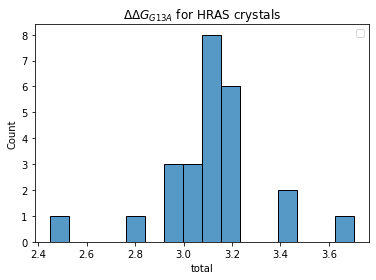

In [9]:
sns.histplot(ddGsDataFrame.total).set_title("$\Delta \Delta G_{G13A}$ for HRAS crystals")
plt.legend()

As can be seen, depending on the structure we have different $\Delta \Delta G$s, but all of them presents a high value, allowing us to infer that the mutation is destabilizing.